In [13]:
# IMPORTS
from vanilla_option import vanilla_option
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')


# INPUTS
S = 100
K = 100
T = 3/12
r = 0.01
q = 0
sd = 0.15

# Basic Theta Shapes

The price of an option is made up by its intrinsic and extrinsic (time) value. As time passes, the time value goes to zero and, at maturity, the option is worth only its intrinsic value (payoff). Theta measures the change in the price of an option as time goes by. It intuitively follows that (in general), theta is negative.

If an option is (deeply) Out-of-The-Money, its theta is essentially zero. When At-The-Money, theta is at its highest (in absolute terms) since the passage of time decreases the probability of the option to get into the money and also because when an option is around ATM its extrinsic value is at its highest.

- When a call option is In-The-Money its time value decreases as the option price converges to the extrinsic value. The passage of time still has a negative effect but it is lower the more the call option is ITM.
- When a put option is (deeply) ITM, theta can be positive as holding a put option gives an interest disadvantage (receiving the strike in the future that cannot be invested) and therefore having a positive effect from the passage of time.


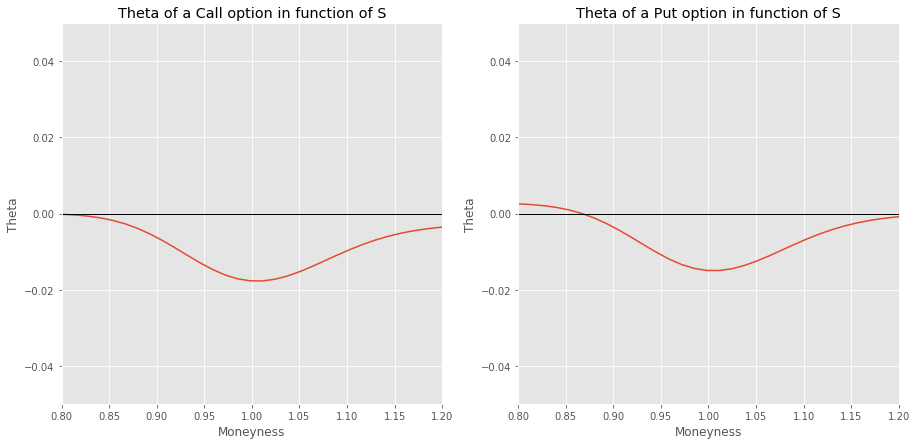

In [14]:
# Adjust size of output
plt.rcParams['figure.figsize'] = [15, 7] 


# Obtain list of spots and moneyness for plotting
spots = list(np.linspace(start = 0.07, stop = 1.3*S, num = 100))
moneyness = [spot / K for spot in spots]


### Delta shape of a Call
option_type = 'Call'
plt.subplot(1, 2, 1)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, sd, option_type).bs_theta() for spot in spots])
plt.xlabel('Moneyness')
plt.ylabel('Theta')
plt.title('Theta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S')
plt.xlim(left=0.8, right =1.2)
plt.ylim(bottom=-0.05, top=0.05)
plt.axhline(linewidth=1, color = 'black')


### Delta shape of a Put
option_type = 'Put'
plt.subplot(1, 2, 2)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, sd, option_type).bs_theta() for spot in spots])
plt.xlabel('Moneyness')
plt.ylabel('Theta')
plt.title('Theta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S')
plt.xlim(left=0.8, right =1.2)
plt.ylim(bottom=-0.05, top=0.05)
plt.axhline(linewidth=1, color = 'black')


# Effects of Volatility and Time on Delta


### Effect of Volatility

Volatility has a positive effect on option prices due to their convex payoff. If long either a call or a put, an investor gains as volatility is higher since there is more probability that the underyling will end up (far) ITM. On the other hand, time has a decreasing effect on the price of an option. It intuitively follows that the higher the volatility and the higher the decremental effect of time passing.

To sum up the intuitive take:

|   Any Moneyness   |
|---|
|Higher volatility -> Higher theta (in absolute value) |
|Lower volatility -> Lower theta (in absolute value) |


### Effect of Time
As time passes, the price of an option converges to its intrinsic value (i.e. the time value gets to zero) and the time value is at its highest around ATM. In general, the longest the maturity of the option and the largest its time value and, as time goes by, the convexity of the price function increases.

- When an option is OTM or ITM, the longest its maturity and the more time value there is to lose. As time passes and the option stays at its moneyness, the less value it loses.

- When an option is ATM, the shortest the maturity and the higher is the difference between the price amd payoff function compared to other level of moneyness where convexity is lower. Therefore, theta is comparatively higher when there is less time to maturity due to the more value there is to lose.

To sum up the intuitive take:

|   OTM/ITM Options   |   ATM Options   |
|---|---|
|Higher time to maturity -> Higher theta (in absolute value)|Higher time to maturity -> Lower theta (in absolute value)|
|Lower time to maturity -> Lower theta (in absolute value)|Lower time to maturity -> Higher theta (in absolute value)|

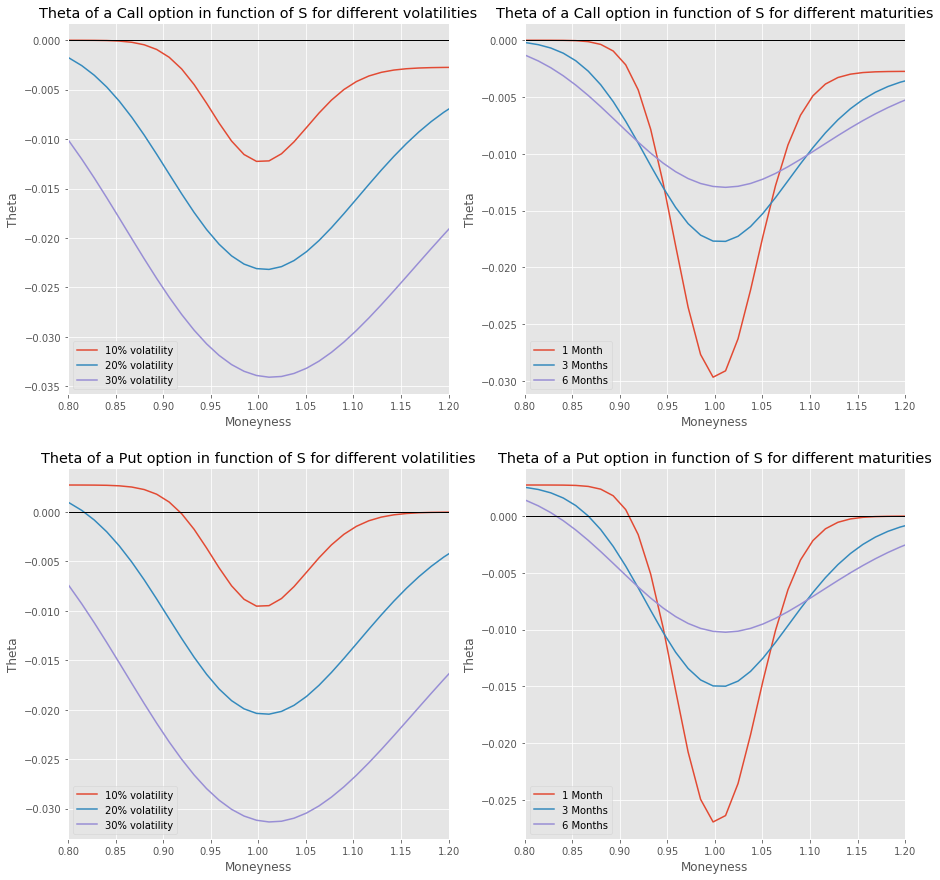

In [21]:
# Adjust size of output
plt.rcParams['figure.figsize'] = [15, 15] 


# Obtain list of spots and moneyness for plotting
spots = list(np.linspace(start = 0.07, stop = 1.3*S, num = 100))
moneyness = [spot / K for spot in spots]


### Delta shape of a Call as time passes and volatility changes
option_type = 'Call'

plt.subplot(2, 2, 1)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.1, option_type).bs_theta() for spot in spots], label = '10% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.2, option_type).bs_theta() for spot in spots], label = '20% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.3, option_type).bs_theta() for spot in spots], label = '30% volatility')
plt.xlabel('Moneyness')
plt.ylabel('Theta')
plt.legend(loc = 'lower left')
plt.title('Theta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different volatilities')
plt.xlim(left=0.8, right =1.2)
plt.axhline(linewidth=1, color = 'black')

plt.subplot(2, 2, 2)
plt.plot(moneyness, [vanilla_option(spot, K, 1/12, r, q, sd, option_type).bs_theta() for spot in spots], label = '1 Month')
plt.plot(moneyness, [vanilla_option(spot, K, 3/12, r, q, sd, option_type).bs_theta() for spot in spots], label = '3 Months')
plt.plot(moneyness, [vanilla_option(spot, K, 6/12, r, q, sd, option_type).bs_theta() for spot in spots], label = '6 Months')
plt.xlabel('Moneyness')
plt.ylabel('Theta')
plt.legend(loc = 'lower left')
plt.title('Theta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different maturities')
plt.xlim(left=0.8, right =1.2)
plt.axhline(linewidth=1, color = 'black')


### Delta shape of a Put as time passes and volatility changes
option_type = 'Put'

plt.subplot(2, 2, 3)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.1, option_type).bs_theta() for spot in spots], label = '10% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.2, option_type).bs_theta() for spot in spots], label = '20% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.3, option_type).bs_theta() for spot in spots], label = '30% volatility')
plt.xlabel('Moneyness')
plt.ylabel('Theta')
plt.legend(loc = 'lower left')
plt.title('Theta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different volatilities')
plt.xlim(left=0.8, right =1.2)
plt.axhline(linewidth=1, color = 'black')


plt.subplot(2, 2, 4)
plt.plot(moneyness, [vanilla_option(spot, K, 1/12, r, q, sd, option_type).bs_theta() for spot in spots], label = '1 Month')
plt.plot(moneyness, [vanilla_option(spot, K, 3/12, r, q, sd, option_type).bs_theta() for spot in spots], label = '3 Months')
plt.plot(moneyness, [vanilla_option(spot, K, 6/12, r, q, sd, option_type).bs_theta() for spot in spots], label = '6 Months')
plt.xlabel('Moneyness')
plt.ylabel('Theta')
plt.legend(loc = 'lower left')
plt.title('Theta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different maturities')
plt.xlim(left=0.8, right =1.2)
plt.axhline(linewidth=1, color = 'black')

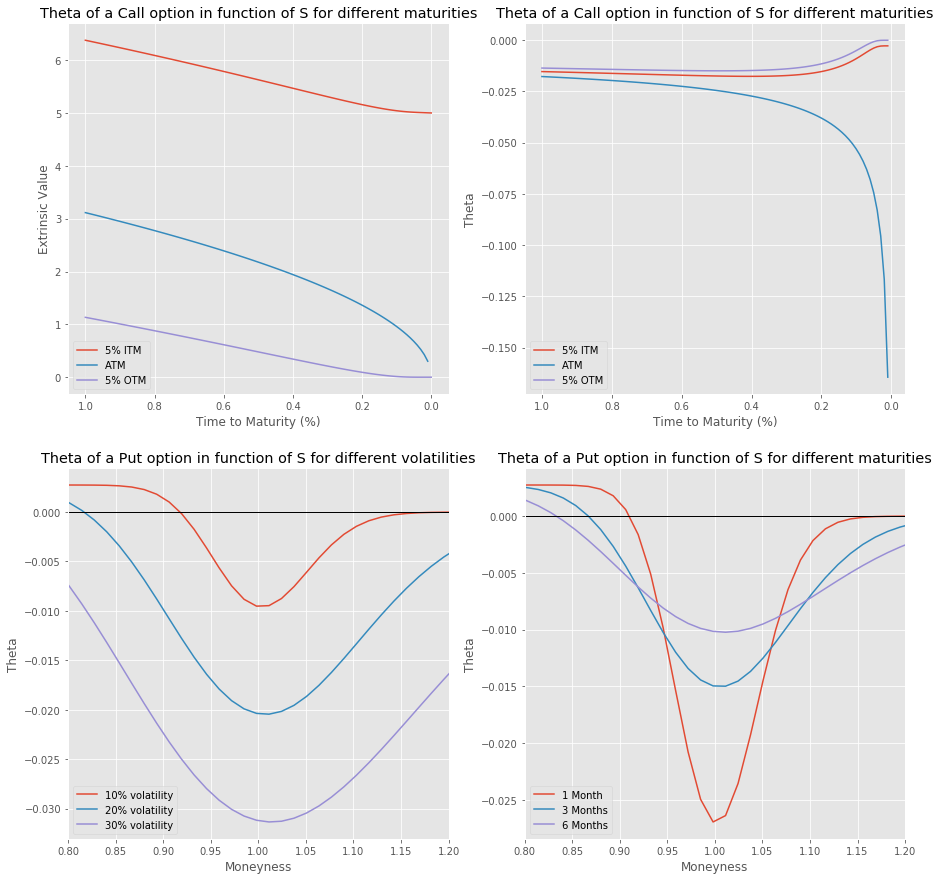

In [23]:
# Adjust size of output
plt.rcParams['figure.figsize'] = [15, 15] 


# Obtain list of spots and moneyness for plotting
spots = list(np.linspace(start = 0.07, stop = 1.3*S, num = 100))
moneyness = [spot / K for spot in spots]
maturities = list(np.linspace(start = T, stop = 0, num = 100))
time_to_mat = [time / T for time in maturities]

### Delta shape of a Call as time passes and volatility changes
option_type = 'Call'

plt.subplot(2, 2, 1)
plt.plot(time_to_mat, [vanilla_option(1.05*K, K, maturity, r, q, sd, option_type).bs_price() for maturity in maturities], label = '5% ITM')
plt.plot(time_to_mat, [vanilla_option(K, K, maturity, r, q, sd, option_type).bs_price() for maturity in maturities], label = 'ATM')
plt.plot(time_to_mat, [vanilla_option(0.95*K, K, maturity, r, q, sd, option_type).bs_price() for maturity in maturities], label = '5% OTM')
plt.xlabel('Time to Maturity (%)')
plt.ylabel('Extrinsic Value')
plt.legend(loc = 'lower left')
plt.title('Theta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different maturities')
plt.gca().invert_xaxis()

plt.subplot(2, 2, 2)
plt.plot(time_to_mat, [vanilla_option(1.05*K, K, maturity, r, q, sd, option_type).bs_theta() for maturity in maturities], label = '5% ITM')
plt.plot(time_to_mat, [vanilla_option(K, K, maturity, r, q, sd, option_type).bs_theta() for maturity in maturities], label = 'ATM')
plt.plot(time_to_mat, [vanilla_option(0.95*K, K, maturity, r, q, sd, option_type).bs_theta() for maturity in maturities], label = '5% OTM')
plt.xlabel('Time to Maturity (%)')
plt.ylabel('Theta')
plt.legend(loc = 'lower left')
plt.title('Theta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different maturities')
plt.gca().invert_xaxis()


### Delta shape of a Put as time passes and volatility changes
option_type = 'Put'

plt.subplot(2, 2, 3)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.1, option_type).bs_theta() for spot in spots], label = '10% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.2, option_type).bs_theta() for spot in spots], label = '20% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.3, option_type).bs_theta() for spot in spots], label = '30% volatility')
plt.xlabel('Moneyness')
plt.ylabel('Theta')
plt.legend(loc = 'lower left')
plt.title('Theta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different volatilities')
plt.xlim(left=0.8, right =1.2)
plt.axhline(linewidth=1, color = 'black')


plt.subplot(2, 2, 4)
plt.plot(moneyness, [vanilla_option(spot, K, 1/12, r, q, sd, option_type).bs_theta() for spot in spots], label = '1 Month')
plt.plot(moneyness, [vanilla_option(spot, K, 3/12, r, q, sd, option_type).bs_theta() for spot in spots], label = '3 Months')
plt.plot(moneyness, [vanilla_option(spot, K, 6/12, r, q, sd, option_type).bs_theta() for spot in spots], label = '6 Months')
plt.xlabel('Moneyness')
plt.ylabel('Theta')
plt.legend(loc = 'lower left')
plt.title('Theta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different maturities')
plt.xlim(left=0.8, right =1.2)
plt.axhline(linewidth=1, color = 'black')
